In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input, decode_predictions

In [4]:
len(os.listdir("C:\\Users\\Harsha\\Desktop\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid"))

38

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
train = train_datagen.flow_from_directory(directory="C:\\Users\\Harsha\\Desktop\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train", target_size=(256,256), batch_size=32)
val = val_datagen.flow_from_directory(directory="C:\\Users\\Harsha\\Desktop\\archive\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
train_image, label = train.next()
val_image, label = val.next()
train_image.shape
val_image.shape

(32, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


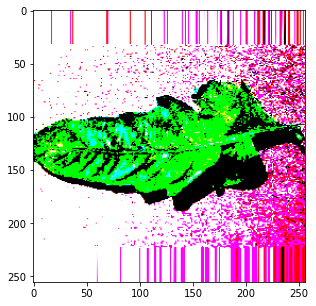

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


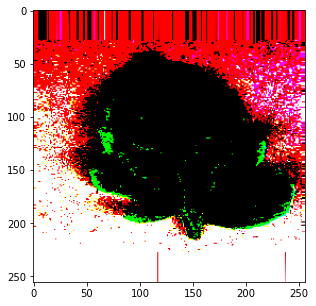

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


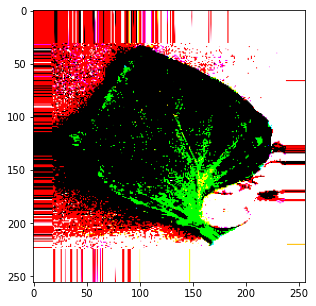

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


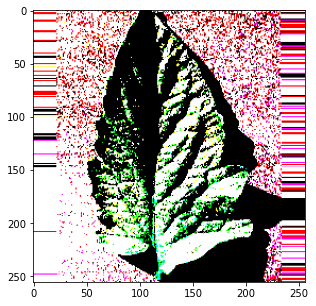

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


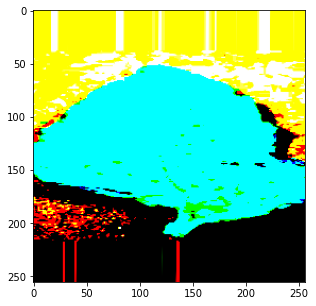

In [12]:
def plotImage(img_arr, label):
  for image, label in zip(img_arr, label):
    plt.figure(figsize=(5,5)) 
    plt.imshow(image) 
    plt.show()
plotImage(train_image[:5], label[:5])

In [13]:
from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras
base_model = VGG19(input_shape=(256,256,3), include_top=False) 
base_model.summary()
for layer in base_model.layers:
  layer.trainable=False
X = Flatten()(base_model.output)
X = Dense(units=38, activation="softmax")(X)
model = Model(base_model.input, X)
model.summary()
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

C:\Users\Harsha\AppData\Local\Temp\ipykernel_21916\1550993277.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=25,


Epoch 1/30
25/25 [==============================] - 247s 10s/step - loss: 21.2673 - accuracy: 0.3050 - val_loss: 14.8645 - val_accuracy: 0.4837
Epoch 2/30
25/25 [==============================] - 235s 10s/step - loss: 12.1001 - accuracy: 0.5325 - val_loss: 9.0127 - val_accuracy: 0.6475
Epoch 3/30
25/25 [==============================] - 236s 10s/step - loss: 11.2288 - accuracy: 0.5900 - val_loss: 6.3797 - val_accuracy: 0.7425
Epoch 4/30
25/25 [==============================] - 233s 9s/step - loss: 9.2411 - accuracy: 0.6538 - val_loss: 6.2204 - val_accuracy: 0.7337
Epoch 5/30
25/25 [==============================] - 233s 9s/step - loss: 9.0793 - accuracy: 0.6662 - val_loss: 7.2994 - val_accuracy: 0.7275
Epoch 6/30
25/25 [==============================] - 233s 9s/step - loss: 8.4760 - accuracy: 0.6862 - val_loss: 7.0594 - val_accuracy: 0.7600
Epoch 7/30
25/25 [==============================] - 247s 10s/step - loss: 8.2186 - accuracy: 0.7025 - val_loss: 6.8886 - val_accuracy: 0.7550
Epoch

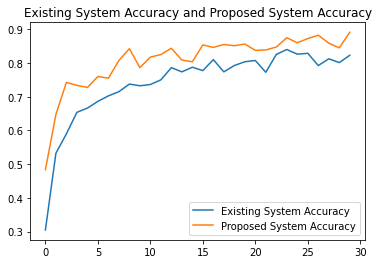

In [18]:


his = model.fit_generator(train, steps_per_epoch=25,
              epochs=30,
              verbose=1,
               validation_data=val,
              validation_steps=25)
h = his.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("Existing System Accuracy and Proposed System Accuracy") 
plt.legend(["Existing System Accuracy", "Proposed System Accuracy", "X-axis-- >Time", "Y-axis-->Accuracy"], loc = "lower right")
plt.show()


In [14]:
model.save("my_model.h5")

In [35]:
from keras.models import load_model
ref = dict(zip( list(train.class_indices.values()), list(train.class_indices.keys())))
model = load_model("C:\\Users\\Harsha\\Desktop\\documents\\my_model.h5")
def pre(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  
  pr = np.argmax(model.predict(img)) 
  print(np.argmax(model.predict(img)))
  print (f"This image belongs to {ref[pr]}")
path = "C:\\Users\\Harsha\\Desktop\\archive\\test\\test\\TomatoYellowCurlVirus6.JPG" 
pre(path)

1/1 [==============================] - 0s 212ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


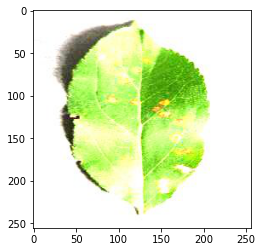

1/1 [==============================] - 0s 198ms/step
2
This image belongs to Apple___Cedar_apple_rust


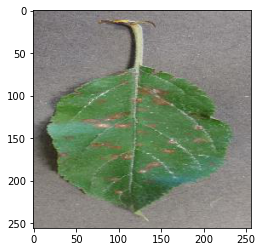

1/1 [==============================] - 0s 220ms/step
2
This image belongs to Apple___Cedar_apple_rust


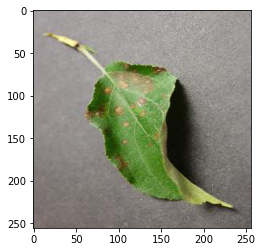

1/1 [==============================] - 0s 253ms/step
2
This image belongs to Apple___Cedar_apple_rust


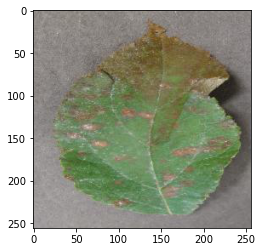

1/1 [==============================] - 0s 236ms/step
2
This image belongs to Apple___Cedar_apple_rust


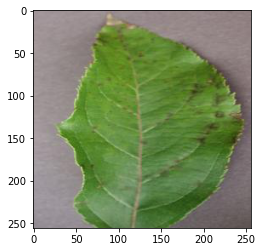

1/1 [==============================] - 0s 297ms/step
2
This image belongs to Apple___Cedar_apple_rust


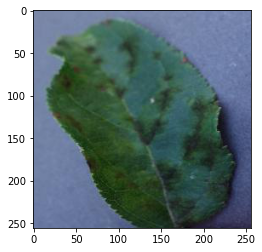

1/1 [==============================] - 0s 200ms/step
2
This image belongs to Apple___Cedar_apple_rust


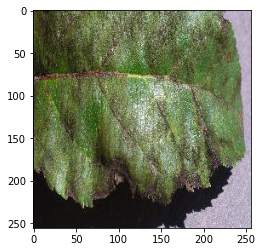

1/1 [==============================] - 0s 321ms/step
20
This image belongs to Potato___Early_blight


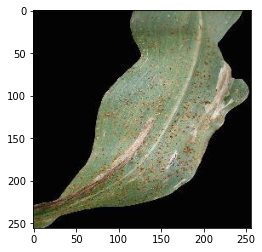

1/1 [==============================] - 0s 332ms/step
8
This image belongs to Corn_(maize)___Common_rust_


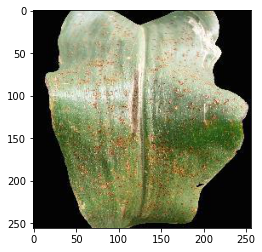

1/1 [==============================] - 0s 281ms/step
8
This image belongs to Corn_(maize)___Common_rust_


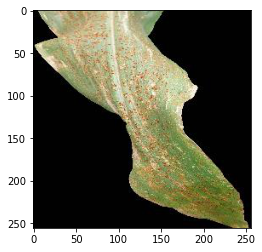

1/1 [==============================] - 0s 283ms/step
8
This image belongs to Corn_(maize)___Common_rust_


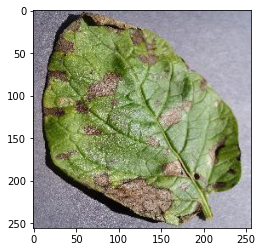

1/1 [==============================] - 0s 261ms/step
20
This image belongs to Potato___Early_blight


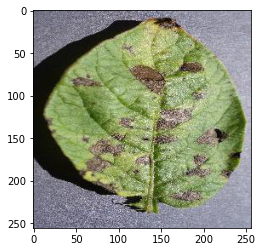

1/1 [==============================] - 0s 224ms/step
20
This image belongs to Potato___Early_blight


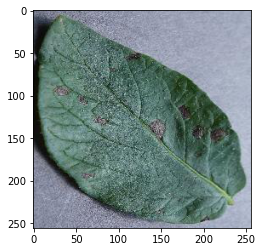

1/1 [==============================] - 0s 199ms/step
22
This image belongs to Potato___healthy


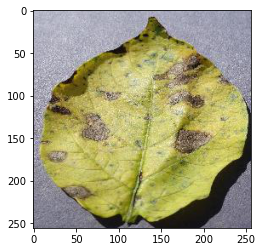

1/1 [==============================] - 0s 264ms/step
20
This image belongs to Potato___Early_blight


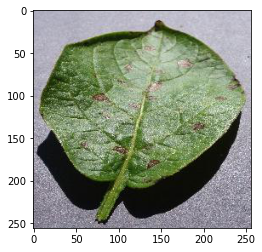

1/1 [==============================] - 0s 287ms/step
20
This image belongs to Potato___Early_blight


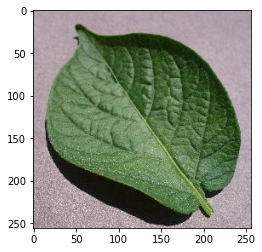

1/1 [==============================] - 0s 261ms/step
22
This image belongs to Potato___healthy


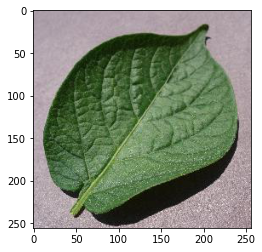

1/1 [==============================] - 0s 265ms/step
22
This image belongs to Potato___healthy


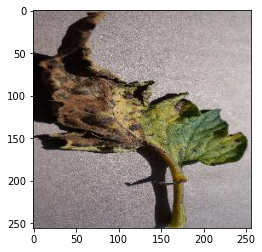

1/1 [==============================] - 0s 256ms/step
29
This image belongs to Tomato___Early_blight


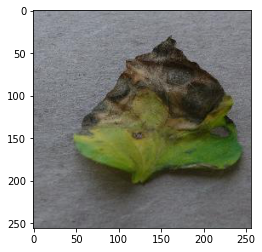

1/1 [==============================] - 0s 268ms/step
30
This image belongs to Tomato___Late_blight


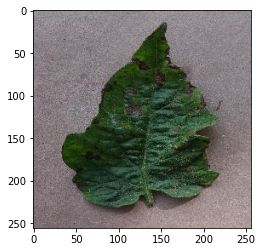

1/1 [==============================] - 0s 209ms/step
32
This image belongs to Tomato___Septoria_leaf_spot


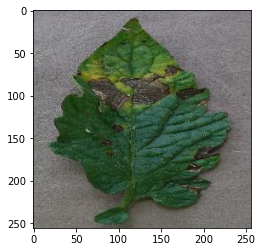

1/1 [==============================] - 0s 280ms/step
29
This image belongs to Tomato___Early_blight


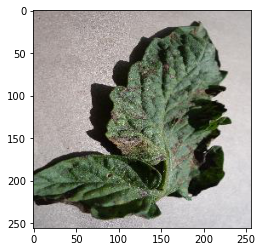

1/1 [==============================] - 0s 203ms/step
30
This image belongs to Tomato___Late_blight


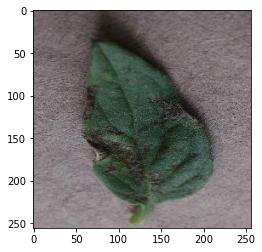

1/1 [==============================] - 0s 273ms/step
28
This image belongs to Tomato___Bacterial_spot


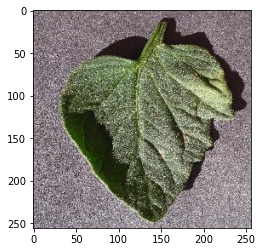

1/1 [==============================] - 0s 225ms/step
37
This image belongs to Tomato___healthy


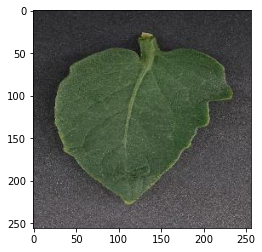

1/1 [==============================] - 0s 264ms/step
30
This image belongs to Tomato___Late_blight


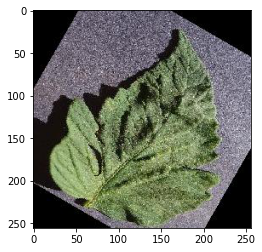

1/1 [==============================] - 0s 298ms/step
37
This image belongs to Tomato___healthy


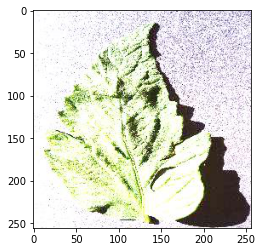

1/1 [==============================] - 0s 244ms/step
37
This image belongs to Tomato___healthy


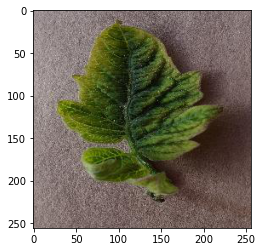

1/1 [==============================] - 0s 204ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


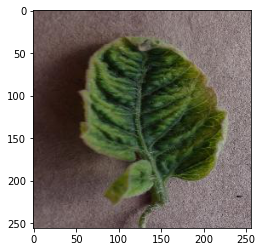

1/1 [==============================] - 0s 241ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


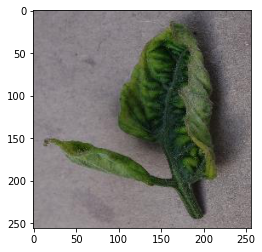

1/1 [==============================] - 0s 226ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


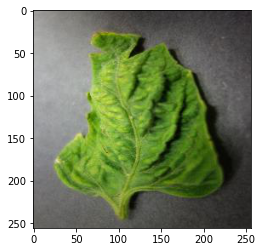

1/1 [==============================] - 0s 252ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


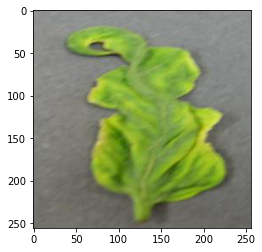

1/1 [==============================] - 0s 269ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


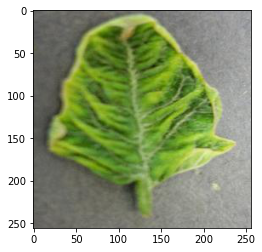

1/1 [==============================] - 0s 258ms/step
35
This image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [36]:
img_path = os.listdir("C:\\Users\\Harsha\\Desktop\\archive\\test\\test")
for img in img_path:
    path="C:\\Users\\Harsha\\Desktop\\archive\\test\\test\\"+img
    imgt = load_img(path, target_size=(256,256))
    plt.imshow(imgt)
    plt.show()
    pre(path)

In [53]:
print(img_path)

['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoYellowCurlVirus6.JPG']


In [11]:
list(train.class_indices.values())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [12]:
list(train.class_indices.keys())

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
path = "C:\\Users\\Harsha\\Desktop\\archive\\test\\test\\TomatoYellowCurlVirus6.JPG" 

model.predict()